In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import copy
from scipy.stats import norm, ncx2


# add the directory where fixed_income_derivatives.py is located to the system path
sys.path.append(os.path.abspath("../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid

%load_ext autoreload
%autoreload 2

## Problem 2

#### (a) Write a function in Python that takes $T$, $r_0$, $a$, $b$ and $\sigma$ and a confidence level $\alpha$ as inputs and returns the lower-, upper- or two-sided confidence bounds of $r_T$

In [2]:
r0, a, b, sigma = 0.04, 2, 0.1, 0.02
N_ci_plot, T = 1000, 10
size_ci = 0.95
mesh_plot = T/N_ci_plot

In [ ]:
T_ci_plot = np.array([i*mesh_plot for i in range(1,N_ci_plot+1)])
lb, ub = fid.ci_vasicek(r0, a, b, sigma, T_ci_plot, size_ci, type_ci='two_sided')
lb_sd, ub_sd = fid.ci_vasicek(r0,a,b,sigma,np.inf,size_ci,type_ci='two_sided')

#### (b) Plot the two-sided confidence bounds for α = 0.05 and appropriately many choices of T < 10 setting r0 = 0.04, a = 2, b = 0.1, σ = 0.02. Also include the two-sided confidence bounds under the stationary distribution in your plot.

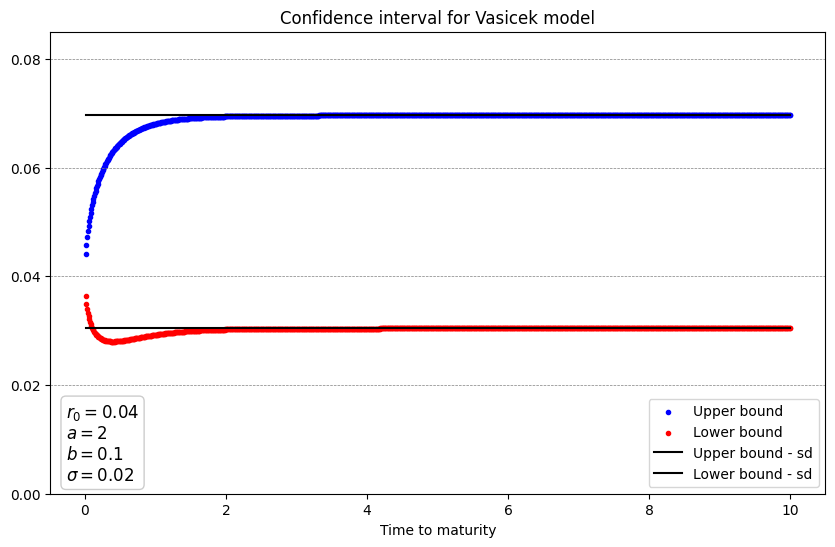

In [4]:
# plot lb and ub and confidence interval
plt.figure(figsize=(10, 6))
plt.scatter(T_ci_plot, ub, label='Upper bound', color='blue', marker='.')
plt.scatter(T_ci_plot, lb, label='Lower bound', color='red', marker='.')
plt.plot(T_ci_plot, ub_sd * np.ones(N_ci_plot), label='Upper bound - sd', color='black')
plt.plot(T_ci_plot, lb_sd * np.ones(N_ci_plot), label='Lower bound - sd', color='black')
plt.xlabel('Time to maturity')
plt.title('Confidence interval for Vasicek model')
plt.legend(loc='lower right')

# Set y-axis to start at 0
plt.ylim(bottom=0, top=0.085)


# Add horizontal lines at each tick mark
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.02))
for tick in ax.get_yticks():
    ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

textstr = f'$r_0={r0}$\n$a={a}$\n$b={b}$\n$\\sigma={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(0.02, 0.02, textstr, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

plt.show()
plt.close()

#### (c) For combinations of $a \in [1,2,4,8]$ and b such that $\frac{b}{a} = 0.05$ (That is, as you are changing a also change b to keep $\frac{b}{a} = 0.05$), and $\sigma \in [0.01,0.02,0.03,0.04]$, redo the plot from b) for a sufficiently large T. For each of the combinations of parameters, assess how large T must be for rT to have settled to it’s stationary distribution. How does the rate at which rT settles to it’s stationary distribution depend on $a$ and $\sigma$?

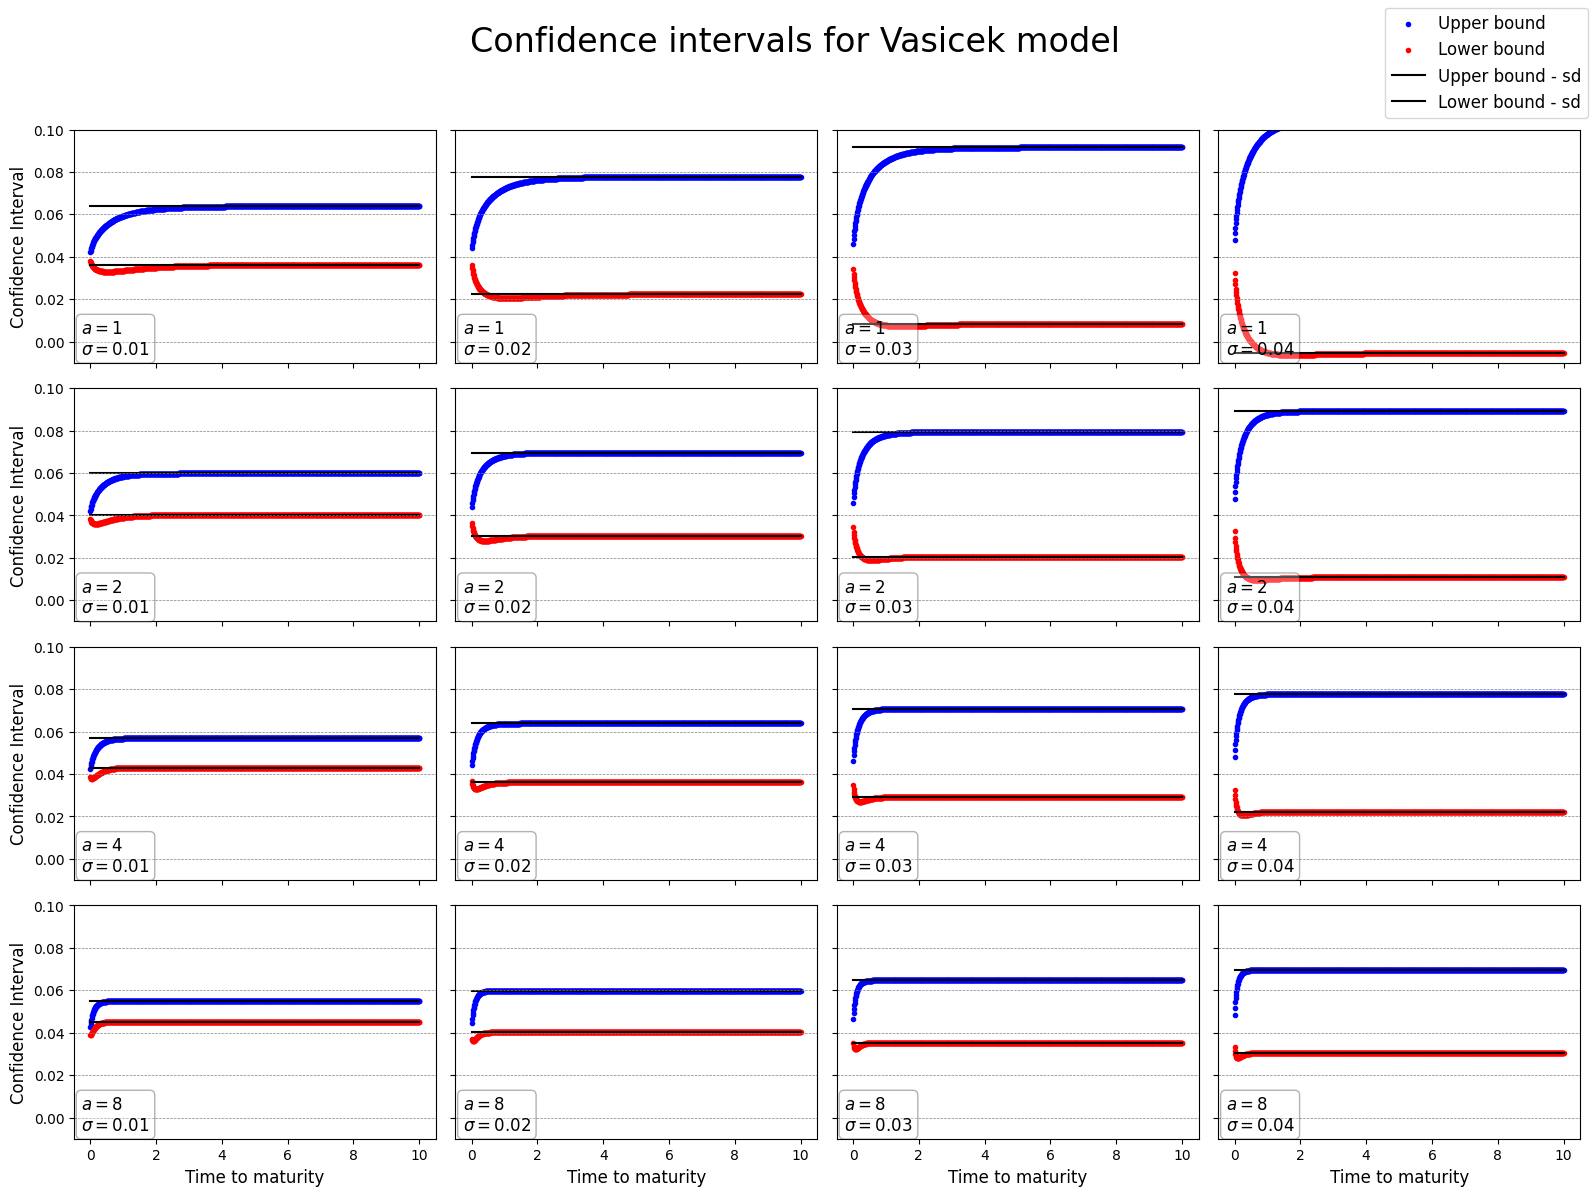

In [5]:
a_range = [1,2,4,8]
sigma_range = [0.01,0.02,0.03,0.04]

fig, axes = plt.subplots(len(a_range), len(sigma_range), figsize=(16, 12), sharex=True, sharey=True)

for i, a in enumerate(a_range):
    b = 0.05*a
    for j, sigma in enumerate(sigma_range):
        lb, ub = fid.ci_vasicek(r0, a, b, sigma, T_ci_plot, size_ci, type_ci='two_sided')
        lb_sd, ub_sd = fid.ci_vasicek(r0, a, b, sigma, np.inf, size_ci, type_ci='two_sided')

        ax = axes[i, j]
        ax.scatter(T_ci_plot, ub, label='Upper bound', color='blue', marker='.')
        ax.scatter(T_ci_plot, lb, label='Lower bound', color='red', marker='.')
        ax.plot(T_ci_plot, ub_sd * np.ones(N_ci_plot), label='Upper bound - sd', color='black')
        ax.plot(T_ci_plot, lb_sd * np.ones(N_ci_plot), label='Lower bound - sd', color='black')
        ax.set_ylim(bottom=-0.01, top=0.1)

        # Add horizontal lines at each tick mark
        ax.yaxis.set_major_locator(MultipleLocator(0.02))
        for tick in ax.get_yticks():
            ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

        # Add parameter info as text in each subplot
        textstr = f'$a={a}$\n$\\sigma={sigma}$'
        props = dict(boxstyle='round', facecolor='white', alpha=0.3)
        ax.text(0.02, 0.02, textstr, transform=ax.transAxes, fontsize=12,
                verticalalignment='bottom', bbox=props)

        if i == len(a_range) - 1:
            ax.set_xlabel('Time to maturity', fontsize=12)
        if j == 0:
            ax.set_ylabel('Confidence Interval', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
fig.suptitle("Confidence intervals for Vasicek model", fontsize=24)
fig.legend(handles, labels,loc='upper right', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
plt.close()

Plotting the confidence intervals for a range of choices of $a$, it is quite clear that the smaller $a$ is, the slower the convergence to the stationary distribution. Also, it seems that though changing $\sigma$ has an effect on the size of the confidence interval, it does not seem that changing $\sigma$ has much effect on the rate of convergence. Recall that the distributions of the short rate for finite T and as T tends to infinity are
\begin{align*}
r_T \vert \mathcal{F}_t &\sim N\left(r_t e^{-a(T-t)} + \frac{b}{a} (1 - e^{-a(T-t)}), \frac{\sigma^2}{2a} (1 - e^{-2a(T-t)})\right) \\
r_{\infty} &\sim N\left(\frac{b}{a}, \frac{\sigma^2}{2a}\right)
\end{align*}
To more precisely say how the parameters affect convergence to the stationary distribution, we can for example find the value of $T$ for which the difference between the upper bounds have fallen to a certain size, $x$ say, for a given level of $\alpha$, here $\alpha = 0.05$, by solving the following equation with respect to some $T^*$
\begin{align*}
x = r_t e^{-a(T^*-t)} + \frac{b}{a} (1 - e^{-a(T^*-t)}) + z_{1-\alpha/2} \sqrt{\frac{\sigma^2}{2a} (1 - e^{-2a(T^*-t)})} - \frac{b}{a} - z_{1-\alpha/2} \sqrt{\frac{\sigma^2}{2a}}
\end{align*}

In [6]:
# I do not know how to program this up – I have tried but to not get any good results.

#### (d) Derive the difference equation for the short rate for each of the three schemes in terms of a standard normal variable denoted $Z_m$ drawn in each of the steps. Are some of the schemes equivalent? Which of the three schemes do you expect to be more accurate?

Since the diffusion coefficient of the dynamics of the short rate is independent of $r_t$, the Milstein and Euler schemes are the same. The exact scheme can be found by using the distribution of $r_{T=t+\delta \vert rt}$
from the above. The difference equations become
\begin{align*}
\text{Euler/Milstein:} \quad r_{m+1} &= r_{m} + (b-ar_m)\delta + \sigma\sqrt{\delta}Z_{m+1}\\
\text{Exact:} \quad r_{m+1} &= r_m e^{-a\delta} + \frac{b}{a} (1 - e^{-a\delta}) + \sigma\sqrt{\frac{1 - e^{-2a\delta}}{2a}}Z_{m+1}
\end{align*}

and needless to say, the scheme based on the solution to the SDE satisfied by the short rate is expected to be most accurate but also, we would expect the difference to be small for large M.

#### (e) Write a python function that take as inputs $T$, $M$, $r0$, $a$, $b$, $\sigma$, and ”scheme”, and returns a simulated trajectory of the short rate. Plot a single trajectory for each of the three schemes setting $r0 = 0.04$, $a = 2$, $b = 0.1$, $\sigma = 0.02$ up to time $T = 10$ and for $M = 10,000$. Include the lower, upper and two-sided confidence bounds in your plot for a choice of $\alpha = 0.1$.

In [7]:
np.random.seed(2025)
r0, a, b, sigma = 0.04, 2, 0.1, 0.02
size_ci = 0.95
T_2e, M = 10, 10000
delta = T_2e/M
T_simul = np.array([i*delta for i in range(0,M+1)])
r_euler = fid.simul_vasicek(r0, a, b, sigma, M, T_2e, method='euler')
r_milstein = fid.simul_vasicek(r0, a, b, sigma, M, T_2e, method='milstein')
r_exact = fid.simul_vasicek(r0, a, b, sigma, M, T_2e, method='exact')
lb_simul, ub_simul = fid.ci_vasicek(r0, a, b, sigma, T_simul, size_ci, type_ci='two_sided')

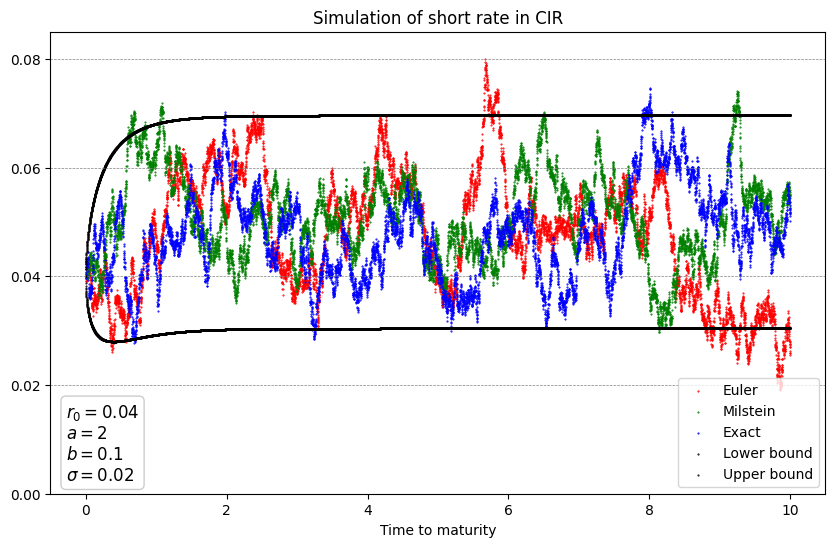

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(T_simul, r_euler, label='Euler', color='red', marker='.', s=1)
plt.scatter(T_simul, r_milstein, label='Milstein', color='green', marker='.', s=1)
plt.scatter(T_simul, r_exact, label='Exact', color='blue', marker='.', s=1)
plt.scatter(T_simul, lb_simul, label='Lower bound', color='black', marker='.', s=1)
plt.scatter(T_simul, ub_simul, label='Upper bound', color='black', marker='.', s=1)

plt.xlabel('Time to maturity')
plt.title('Simulation of short rate in CIR')
plt.ylim(bottom=0, top=0.085)

# Add horizontal lines at each tick mark
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.02))
for tick in ax.get_yticks():
    ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

plt.legend(loc='lower right')

textstr = f'$r_0={r0}$\n$a={a}$\n$b={b}$\n$\\sigma={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(0.02, 0.02, textstr, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

plt.show()
plt.close()

#### (f) Now set $T = 3$, repeat the simulations $N$ times and denote the value of the short rate at $T = 3$ in the $n$’th simulation by $r_{3n}$, $n = 1,2,...,N$. Construct at least 50 but ideally more equally spaced bins to cover the range of $r_{3n}$ from the smallest to the largest value. Sort your simulated values into these bins and use the proportion in each bin to construct an empirical probability mass function. Plot the empirical mass function for your favorite scheme with $N = 1000$ and $M = 1000$, Also plot the theoretical mass function in the same figure.

In [9]:
r0, a, b, sigma = 0.04, 2, 0.1, 0.02
size_ci = 0.95
T_3, M, N = 3, 1000, 1000
delta = T_3/M
method = 'exact'

np.random.seed(2025)
r3n = np.zeros(N)
for i in range(N):
    r3n[i] = fid.simul_vasicek(r0, a, b, sigma, M, T_3, method=method)[-1]

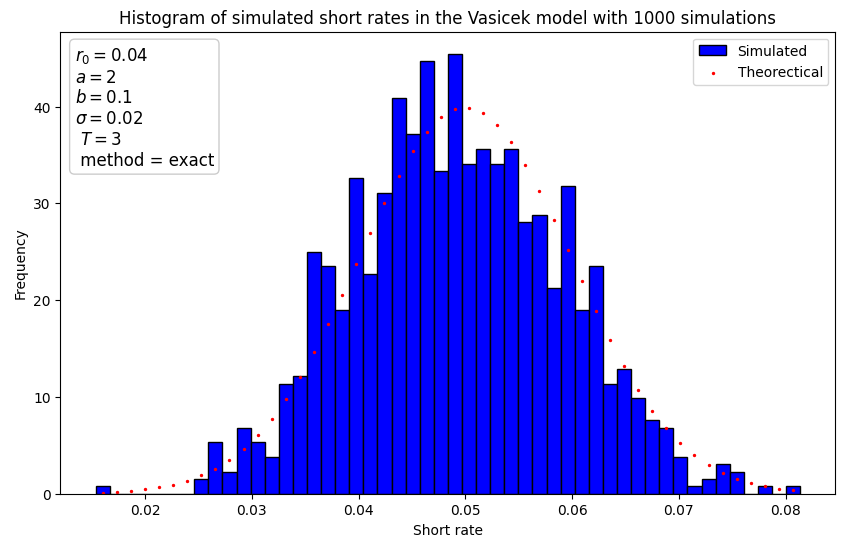

In [10]:
bins = 50

mu = np.exp(-a*T_3)*r0 + b/a*(1-np.exp(-a*T_3))
std = np.sqrt(sigma**2/(2*a)*(1-np.exp(-2*a*T_3)))

# plot the histogram of the simulated short rates with 100 equally spaced bins
plt.figure(figsize=(10, 6))
plt.hist(r3n, bins=bins, color='blue', edgecolor='black', label='Simulated', density=True)

# add normal distribution with mean and standard deviation of the short rate to the plot
hist, bin_edges = np.histogram(r3n, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf_values = norm.pdf(bin_centers, mu, std)
plt.scatter(bin_centers, pdf_values, color='red', label="Theorectical", s=2)

plt.xlabel('Short rate')
plt.ylabel('Frequency')
plt.title(f'Histogram of simulated short rates in the Vasicek model with {N} simulations')
textstr = f'$r_0={r0}$\n$a={a}$\n$b={b}$\n$\\sigma={sigma}$\n $T = {T_3}$\n method = {method}'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(-0.065, 0.675, textstr, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)
plt.legend(loc='upper right')
plt.show()
plt.close()

#### (g) Finally, we will investigate how the difference between the empirical and theoretical PMF’s depend on $M$ and $N$. For a choice of 100 bins and combinations of values of $M \in [2000,4000,6000,8000,10000]$ and $N \in [2000,4000,6000,8000,10000]$, compute the total square difference between the theoretical probabilities and empirical frequencies across the 100 bins. Report the total squared differences for all combinations of $M$ and $N$, and for all three schemes. Compare the accuracy of the three schemes and try to assess how large $M$ and $N$ need to be in each of the three cases to arrive at a reasonable accuracy

In [11]:
M, N = 10000, 10000

np.random.seed(2025)
r3n = np.zeros(N)
for i in range(N):
    r3n[i] = fid.simul_vasicek(r0, a, b, sigma, M, T_3, method=method)[-1]

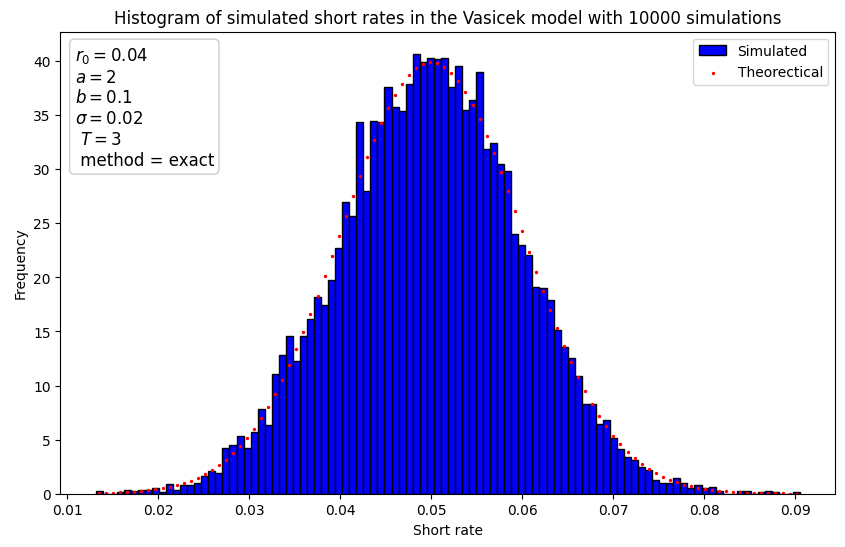

In [12]:
bins = 100

# plot the histogram of the simulated short rates with 100 equally spaced bins
plt.figure(figsize=(10, 6))
plt.hist(r3n, bins=bins, color='blue', edgecolor='black', label='Simulated', density=True)

# add normal distribution with mean and standard deviation of the short rate to the plot
hist, bin_edges = np.histogram(r3n, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf_values = norm.pdf(bin_centers, mu, std)
plt.scatter(bin_centers, pdf_values, color='red', label="Theorectical", s=2)

plt.xlabel('Short rate')
plt.ylabel('Frequency')
plt.title(f'Histogram of simulated short rates in the Vasicek model with {N} simulations')
textstr = f'$r_0={r0}$\n$a={a}$\n$b={b}$\n$\\sigma={sigma}$\n $T = {T_3}$\n method = {method}'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(-0.065, 0.675, textstr, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)
plt.legend(loc='upper right')
plt.show()
plt.close()

In [13]:
M_range = [1000] # here smaller range to avoid long computation time
N_range = [2000, 4000, 6000, 8000, 10000]
method = 'exact'

SSE = np.zeros((len(M_range), len(N_range)))
r3n = np.zeros(np.max(N_range))

np.random.seed(2025)
for j, M in enumerate(M_range):
    for k in range(np.max(N_range)):
        r3n[k] = fid.simul_vasicek(r0, a, b, sigma, M, T_3, method=method)[-1]
    for i, N in enumerate(N_range):
        r3n_temp = copy.deepcopy(r3n)
        r3n_temp = r3n_temp[:N]
        hist, bin_edges = np.histogram(r3n_temp, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        pdf_values = norm.pdf(bin_centers, mu, std)
        SSE[j, i] = np.sum((hist/100 - pdf_values/100)**2)
        
print(SSE)

[[0.09557013 0.06730149 0.03210514 0.01544784 0.01216585]]


In [14]:
method = 'euler'

SSEe = np.zeros((len(M_range), len(N_range)))
r3n = np.zeros(np.max(N_range))

np.random.seed(2025)
for j, M in enumerate(M_range):
    for k in range(np.max(N_range)):
        r3n[k] = fid.simul_vasicek(r0, a, b, sigma, M, T_3, method=method)[-1]
    for i, N in enumerate(N_range):
        r3n_temp = copy.deepcopy(r3n)
        r3n_temp = r3n_temp[:N]
        hist, bin_edges = np.histogram(r3n_temp, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        pdf_values = norm.pdf(bin_centers, mu, std)
        SSEe[j, i] = np.sum((hist/100 - pdf_values/100)**2)
        
print(SSEe)

[[0.10137764 0.06420436 0.02951685 0.01443409 0.01142874]]


In [15]:
# I still cannot calculate T properly – but the SSE should be correct (though higher than his and I cannot verify it either)

As one would expect, the two PMF’s align much more closely now compared to the plot in 2f. The average of r3 from the simulation was in this instance 0.049924927 compared to the theoretical mean of 0.049975212 and the sample standard deviation of r3 based on the simulation came out to 0.010020180 which should be compared to a theoretical standard deviation of 0.009999969. The first two moments are in other words fairly accurately estimated from the simulated values of the short rate. Below the Sum of Squared Errors (SSE) and the run-times are reported for both the Euler scheme and the exact scheme where M increases by the row and N increases by the column. The SSE for the Euler scheme reveals that there might be a small improvement in accuracy when increasing M but the pattern is not clear, however increasing N certainly reduces the SSE. Similarly for the exact scheme, it is not clear that the SSE falls as M increases but certainly, the SSE falls as N increases. Overall, it does not seem that the exact scheme is significantly better than the Euler Scheme in terms of the SSE, but the exact scheme is roughly four times slower. We might have expected that the exact scheme would perform better than the Euler scheme but the fact that this does not seem to be the case simply reflects that the choices of M were sufficient to guarantee that the simulated values of r3 come from the correct distribution. As for the reduction of SSE as a function of N, we did see a significant improvement in SSE as function of N and in fact, it can be shown that doubling the N roughly reduces the expected SSE by a factor of 2.

---

## Problem 3

#### (a) Write a function in Python that takes $T$, $r_0$, $a$, $b$ and $\sigma$ and a confidence level $\alpha$ as inputs and returns the lower-, upper- or two-sided confidence bounds of $r_T$

In [16]:
r0, a, b, sigma = 0.04, 2, 0.05, 0.1
N_ci_plot, T = 1000, 10
size_ci = 0.95
mesh_plot = T/N_ci_plot

In [17]:
T_ci_plot = np.array([i*mesh_plot for i in range(1,N_ci_plot+1)])
lb, ub = fid.ci_cir(r0, a, b, sigma, T_ci_plot, size_ci, type_ci='two_sided')
lb_sd, ub_sd = fid.ci_cir(r0,a,b,sigma,np.inf,size_ci,type_ci='two_sided')

#### (b) Plot the two-sided confidence bounds for $\alpha = 0.05$ and appropriately many choices of $T < 10$ setting $r_0 = 0.04$, $a = 2$, $b = 0.05$, $\sigma = 0.1$. Also include the two-sided confidence bounds under the stationary distribution in your plot.

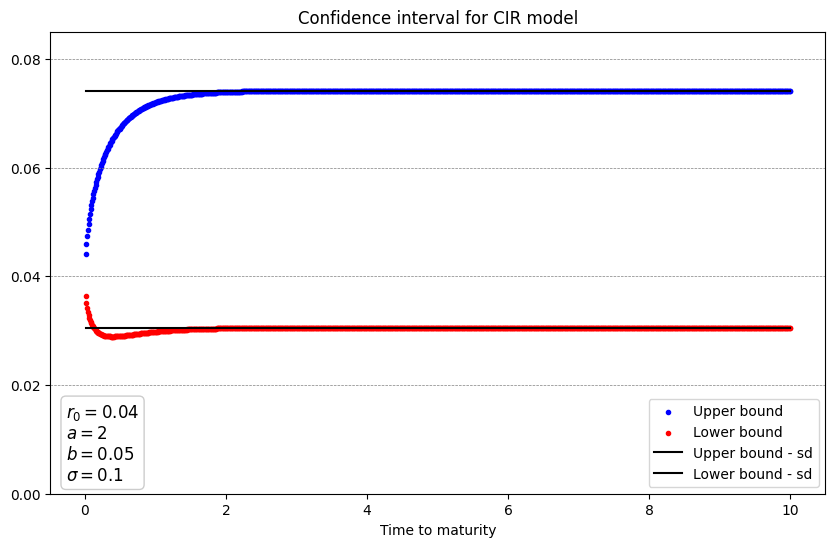

In [18]:
# plot lb and ub and confidence interval
plt.figure(figsize=(10, 6))
plt.scatter(T_ci_plot, ub, label='Upper bound', color='blue', marker='.')
plt.scatter(T_ci_plot, lb, label='Lower bound', color='red', marker='.')
plt.plot(T_ci_plot, ub_sd * np.ones(N_ci_plot), label='Upper bound - sd', color='black')
plt.plot(T_ci_plot, lb_sd * np.ones(N_ci_plot), label='Lower bound - sd', color='black')
plt.xlabel('Time to maturity')
plt.title('Confidence interval for CIR model')
plt.legend(loc='lower right')

# Set y-axis to start at 0
plt.ylim(bottom=0, top=0.085)


# Add horizontal lines at each tick mark
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.02))
for tick in ax.get_yticks():
    ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

textstr = f'$r_0={r0}$\n$a={a}$\n$b={b}$\n$\\sigma={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(0.02, 0.02, textstr, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

plt.show()
plt.close()

#### (c) For combinations of $a \in [1,2,4,8]$, $b$ fixed at $0.05$, $\sigma \in [0.05,0.1,0.15,0.2]$, redo the plot from b) for a sufficiently large T. For each of the combinations of parameters, assess how large T must be for $r_T$ to have settled to it’s stationary distribution. How does the rate at which $r_T$ settles to it’s stationary distribution depend on $a$ and $\sigma$?

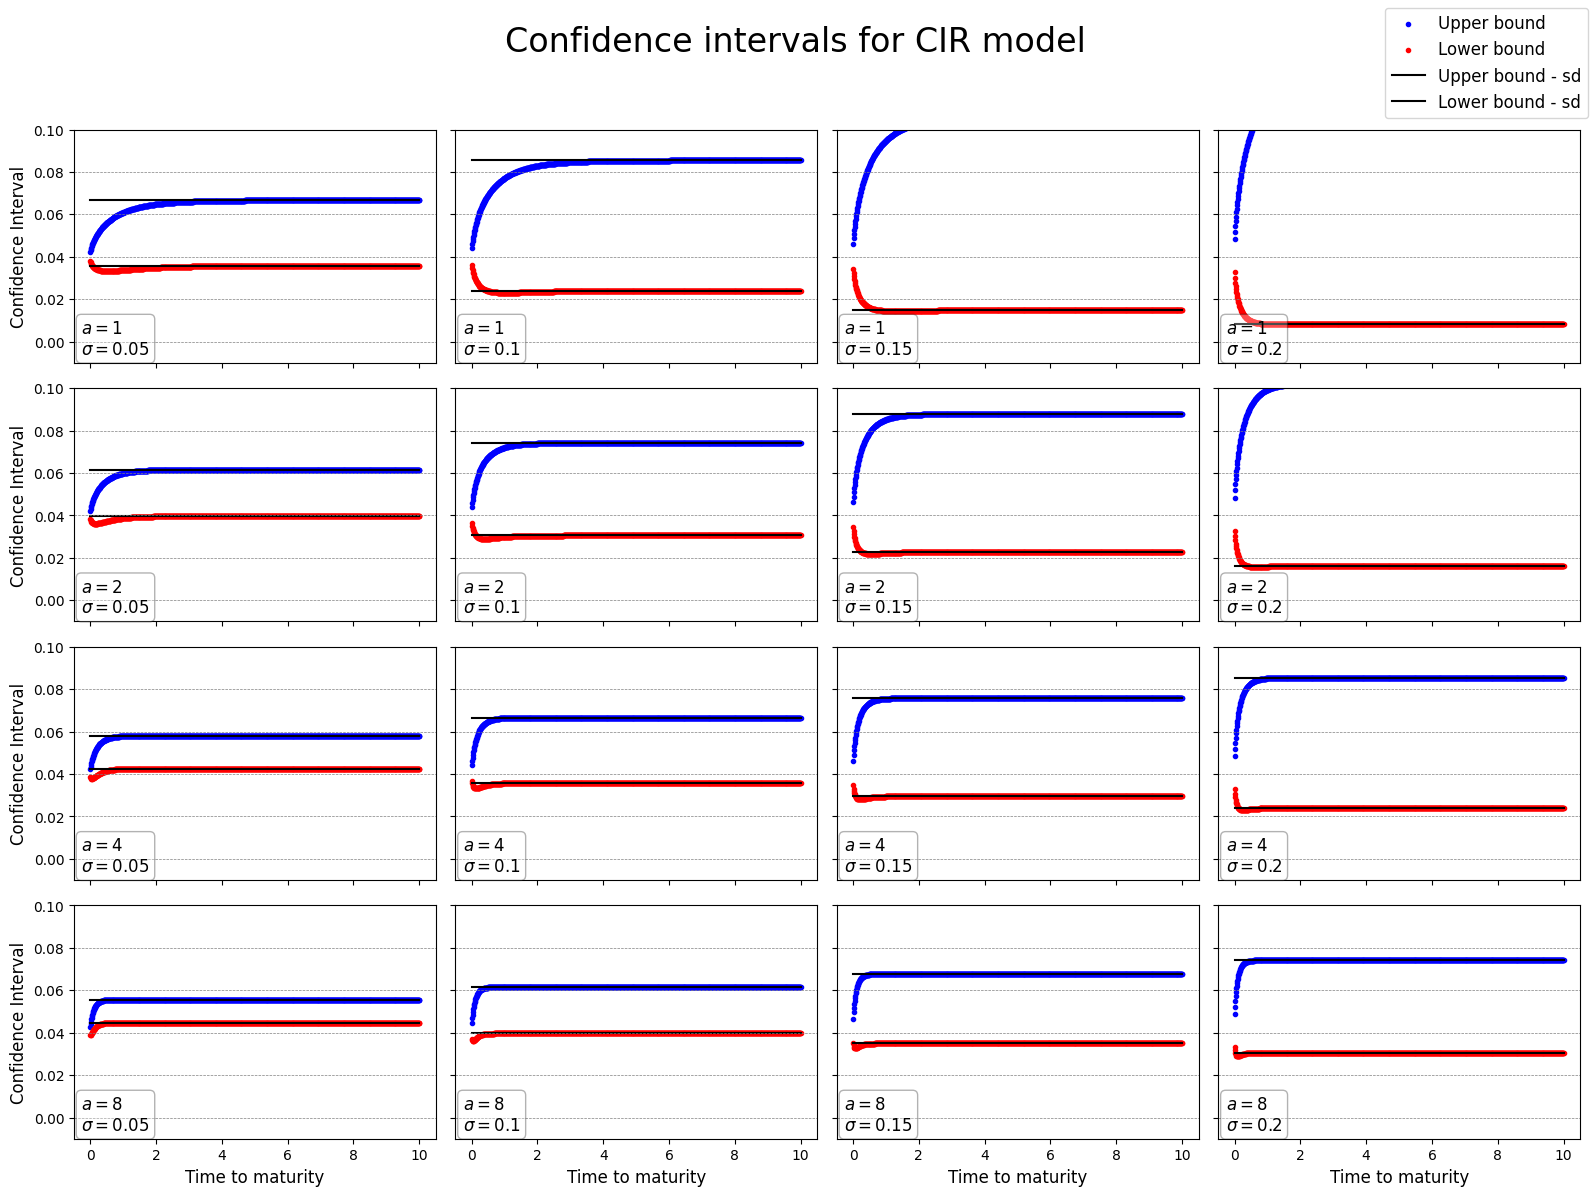

In [19]:
a_range = [1, 2, 4, 8]
sigma_range = [0.05, 0.1, 0.15, 0.2]
b = 0.05

fig, axes = plt.subplots(len(a_range), len(sigma_range), figsize=(16, 12), sharex=True, sharey=True)

for i, a in enumerate(a_range):
    for j, sigma in enumerate(sigma_range):
        lb, ub = fid.ci_cir(r0, a, b, sigma, T_ci_plot, size_ci, type_ci='two_sided')
        lb_sd, ub_sd = fid.ci_cir(r0, a, b, sigma, np.inf, size_ci, type_ci='two_sided')

        ax = axes[i, j]
        ax.scatter(T_ci_plot, ub, label='Upper bound', color='blue', marker='.')
        ax.scatter(T_ci_plot, lb, label='Lower bound', color='red', marker='.')
        ax.plot(T_ci_plot, ub_sd * np.ones(N_ci_plot), label='Upper bound - sd', color='black')
        ax.plot(T_ci_plot, lb_sd * np.ones(N_ci_plot), label='Lower bound - sd', color='black')
        ax.set_ylim(bottom=-0.01, top=0.1)

        # Add horizontal lines at each tick mark
        ax.yaxis.set_major_locator(MultipleLocator(0.02))
        for tick in ax.get_yticks():
            ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

        # Add parameter info as text in each subplot
        textstr = f'$a={a}$\n$\\sigma={sigma}$'
        props = dict(boxstyle='round', facecolor='white', alpha=0.3)
        ax.text(0.02, 0.02, textstr, transform=ax.transAxes, fontsize=12,
                verticalalignment='bottom', bbox=props)

        if i == len(a_range) - 1:
            ax.set_xlabel('Time to maturity', fontsize=12)
        if j == 0:
            ax.set_ylabel('Confidence Interval', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
fig.suptitle("Confidence intervals for CIR model", fontsize=24)
fig.legend(handles, labels,loc='upper right', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
plt.close()

#### (d) Derive the difference equation for the short rate for each of the three schemes (if it is possible!) in terms of a standard normal variable denoted $Z_m$ drawn in each of the steps. Are some of the schemes equivalent? Which of the three schemes do you expect to be more accurate?

The SDE
\begin{align*}
dr_t &= a(b-r_t)dt + \sigma \sqrt{r_t}dW_t, \quad t>0, \quad r_0 = r
\end{align*}
For the short rate in the CIR model can not be solved explicitly and the closest we can get is to write
\begin{align*}
r_T = r_t e^{-a(T-t)} + b(1 - e^{-a(T-t)}) + \sigma \int_t^T e^{-a(T-s)}\sqrt{r_s}dW_s
\end{align*}
It is therefore not possible to write an exact difference equation for $r_{m+1}$ in terms of $r_m$ and a standard normal random variable. What we can however do is to use that $r_{m+1}\vert r_m$ is equal in distribution to a random variable $X_{m+1}$ where
\begin{align*}
X_{m+1} = \frac{\sigma^2}{4a}\left(1-e^{-a\delta}\right)Y_{m+1}
\end{align*}
and $Y_{m+1}$ follows a non-central chi-squared distribution with k degrees of freedom and non-centrality parameter $\lambda$
\begin{align*}
k = \frac{4ab}{\sigma^2}, \quad \lambda = r_m\frac{4ae^{-a\delta}}{\sigma^2(1-e^{-a\delta})}
\end{align*}
An exact approach would thus involve drawing Ym+1 from the appropriate non-central chi-squared distribution and using (27) to generate the increments to the short rate. The three schemes therefore become
\begin{align*}
\text{Euler:} \quad r_{m+1} &= r_m + a(b-r_m)\delta + \sigma\sqrt{r_m}\sqrt{\delta}Z_{m+1}\\
\text{Milstein:} \quad r_{m+1} &= r_m + a(b-r_m)\delta + \sigma\sqrt{r_m}\sqrt{\delta}Z_{m+1} + \frac{1}{2}\sigma^2\delta\left(Z_{m+1}^2-1\right)\\
\text{Exact:} \quad r_{m+1} &= X_{m+1}
\end{align*}
We would expect the third scheme to be the most accurate in terms of reproducing the true distribution of the short rate but for large values of $M$, the difference is likely small.

#### (e)

In [20]:
np.random.seed(2024)
T_2e, M = 10, 10000
delta = T_2e/M
T_simul = np.array([i*delta for i in range(0,M+1)])
r_euler = fid.simul_cir(r0, a, b, sigma, M, T_2e, method='euler')
r_milstein = fid.simul_cir(r0, a, b, sigma, M, T_2e, method='milstein')
r_exact = fid.simul_cir(r0, a, b, sigma, M, T_2e, method='exact')
lb_simul, ub_simul = fid.ci_cir(r0, a, b, sigma, T_simul, size_ci, type_ci='two_sided')

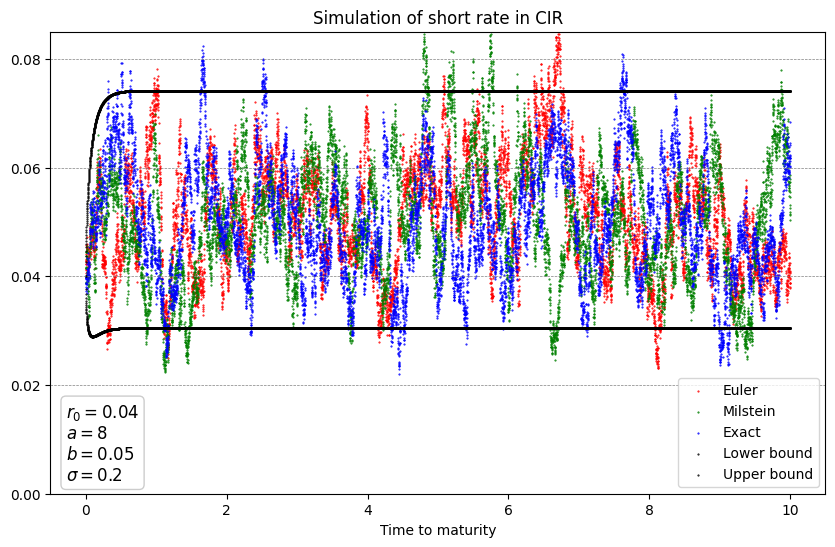

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(T_simul, r_euler, label='Euler', color='red', marker='.', s=1)
plt.scatter(T_simul, r_milstein, label='Milstein', color='green', marker='.', s=1)
plt.scatter(T_simul, r_exact, label='Exact', color='blue', marker='.', s=1)
plt.scatter(T_simul, lb_simul, label='Lower bound', color='black', marker='.', s=1)
plt.scatter(T_simul, ub_simul, label='Upper bound', color='black', marker='.', s=1)

plt.xlabel('Time to maturity')
plt.title('Simulation of short rate in CIR')
plt.ylim(bottom=0, top=0.085)

# Add horizontal lines at each tick mark
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.02))
for tick in ax.get_yticks():
    ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

plt.legend(loc='lower right')

textstr = f'$r_0={r0}$\n$a={a}$\n$b={b}$\n$\\sigma={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(0.02, 0.02, textstr, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

plt.show()
plt.close()

#### (f) Now set $T = 3$, repeat the simulations $N$ times and denote the value of the short rate at $T = 3$ in the $n$’th simulation by $r_{3n}$, $n = 1,2,...,N$. Construct at least 50 but ideally more equally spaced bins to cover the range of $r_{3n}$ from the smallest to the largest value. Sort your simulated values into these bins and use the proportion in each bin to construct an empirical probability mass function. Plot the empirical mass function for your favorite scheme with $N = 1000$ and $M = 1000$, Also plot the theoretical mass function in the same figure.


In [22]:
r0, a, b, sigma = 0.04, 2, 0.05, 0.1
size_ci = 0.95
T_3, M, N = 3, 1000, 1000
delta = T_3/M
method = 'exact'

np.random.seed(2025)
r3n = np.zeros(N)
for i in range(N):
    r3n[i] = fid.simul_cir(r0, a, b, sigma, M, T_3, method=method)[-1]

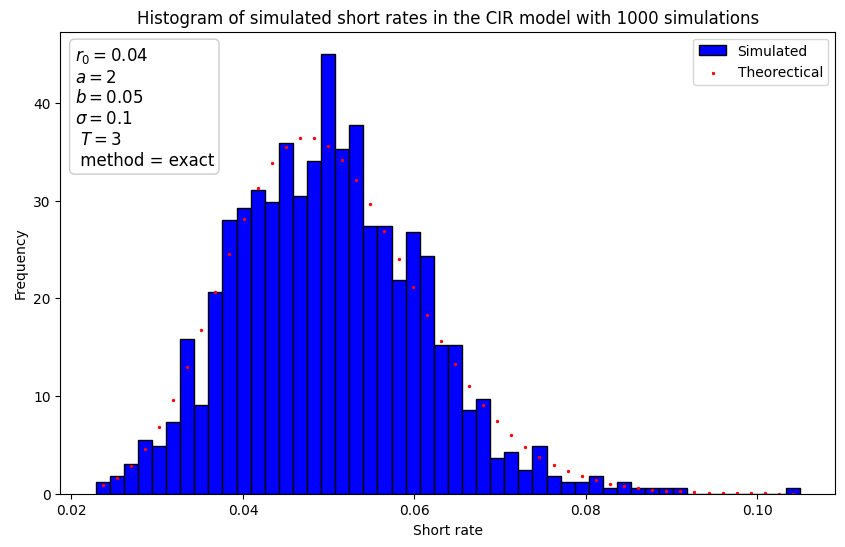

In [23]:
bins = 50

df = 4*a*b/sigma**2
noncentrality = (4*a*np.exp(-a*T_3))/(sigma**2*(1-np.exp(-a*T_3)))*r0
scale = (sigma**2 * (1 - np.exp(-a * T_3))) / (4 * a)

# plot the histogram of the simulated short rates with 100 equally spaced bins
plt.figure(figsize=(10, 6))
plt.hist(r3n, bins=bins, color='blue', edgecolor='black', label='Simulated', density=True)

# add chi2 distribution with mean and standard deviation of the short rate to the plot
hist, bin_edges = np.histogram(r3n, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf_values = ncx2.pdf(bin_centers/scale, df=df, nc = noncentrality)/scale
plt.scatter(bin_centers, pdf_values, color='red', label="Theorectical", s=2)

plt.xlabel('Short rate')
plt.ylabel('Frequency')
plt.title(f'Histogram of simulated short rates in the CIR model with {N} simulations')
textstr = f'$r_0={r0}$\n$a={a}$\n$b={b}$\n$\\sigma={sigma}$\n $T = {T_3}$\n method = {method}'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(-0.065, 0.675, textstr, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)
plt.legend(loc='upper right')
plt.show()
plt.close()

#### (g) Finally, we will investigate how the difference between the empirical and theoretical PMF’s depend on $M$ and $N$. For a choice of 100 bins and combinations of values of $M \in [2000,4000,6000,8000,10000]$ and $N \in [2000,4000,6000,8000,10000]$, compute the total square difference between the theoretical probabilities and empirical frequencies across the 100 bins. Report the total squared differences for all combinations of $M$ and $N$, and for all three schemes. Compare the accuracy of the three schemes and try to assess how large $M$ and $N$ need to be in each of the three cases to arrive at a reasonable accuracy

In [24]:
M, N = 1000, 10000 # here smaller M to avoid long computation time

np.random.seed(2025)
r3n = np.zeros(N)
for i in range(N):
    r3n[i] = fid.simul_cir(r0, a, b, sigma, M, T_3, method=method)[-1]

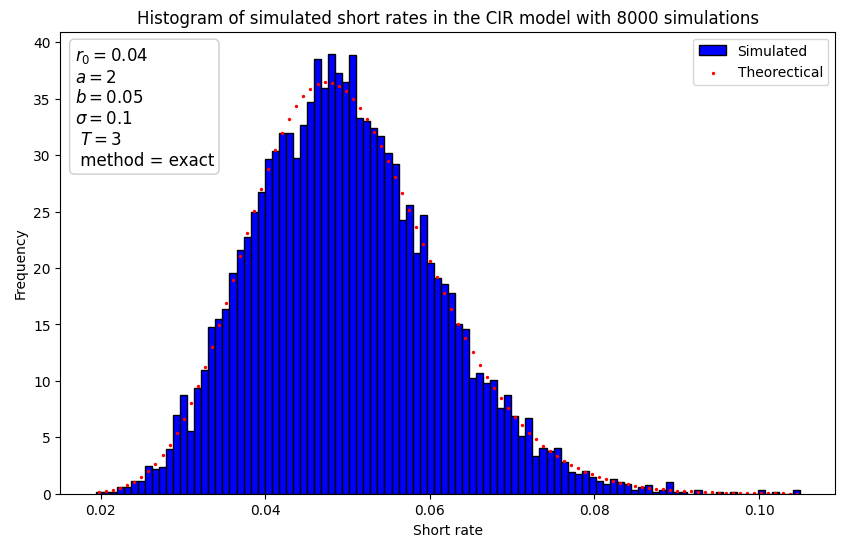

In [25]:
bins = 100

df = 4*a*b/sigma**2
noncentrality = (4*a*np.exp(-a*T_3))/(sigma**2*(1-np.exp(-a*T_3)))*r0
scale = (sigma**2 * (1 - np.exp(-a * T_3))) / (4 * a)

# plot the histogram of the simulated short rates with 100 equally spaced bins
plt.figure(figsize=(10, 6))
plt.hist(r3n, bins=bins, color='blue', edgecolor='black', label='Simulated', density=True)

# add chi2 distribution with mean and standard deviation of the short rate to the plot
hist, bin_edges = np.histogram(r3n, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf_values = ncx2.pdf(bin_centers/scale, df=df, nc = noncentrality)/scale
plt.scatter(bin_centers, pdf_values, color='red', label="Theorectical", s=2)

plt.xlabel('Short rate')
plt.ylabel('Frequency')
plt.title(f'Histogram of simulated short rates in the CIR model with {N} simulations')
textstr = f'$r_0={r0}$\n$a={a}$\n$b={b}$\n$\\sigma={sigma}$\n $T = {T_3}$\n method = {method}'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(-0.065, 0.675, textstr, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)
plt.legend(loc='upper right')
plt.show()
plt.close()

In [26]:
M_range = [1000] # here smaller range to avoid long computation time
N_range = [2000, 4000, 6000, 8000, 10000]
method = 'exact'

SSE = np.zeros((len(M_range), len(N_range)))
r3n = np.zeros(np.max(N_range))

np.random.seed(2025)
for j, M in enumerate(M_range):
    for k in range(np.max(N_range)):
        r3n[k] = fid.simul_cir(r0, a, b, sigma, M, T_3, method=method)[-1]
    for i, N in enumerate(N_range):
        r3n_temp = copy.deepcopy(r3n)
        r3n_temp = r3n_temp[:N]
        hist, bin_edges = np.histogram(r3n_temp, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        pdf_values = norm.pdf(bin_centers, mu, std)
        SSE[j, i] = np.sum((hist/100 - pdf_values/100)**2)
        
print(SSE)

[[0.10718483 0.07608655 0.05966649 0.06115995]]


In [29]:
method = 'milstein'

SSEm = np.zeros((len(M_range), len(N_range)))
r3n = np.zeros(np.max(N_range))

np.random.seed(2025)
for j, M in enumerate(M_range):
    for k in range(np.max(N_range)):
        r3n[k] = fid.simul_cir(r0, a, b, sigma, M, T_3, method=method)[-1]
    for i, N in enumerate(N_range):
        r3n_temp = copy.deepcopy(r3n)
        r3n_temp = r3n_temp[:N]
        hist, bin_edges = np.histogram(r3n_temp, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        pdf_values = norm.pdf(bin_centers, mu, std)
        SSEm[j, i] = np.sum((hist/100 - pdf_values/100)**2)
        
print(SSEm)

[[0.18931615 0.14679364 0.1015819  0.08610182]]


In [30]:
method = 'euler'

SSEe = np.zeros((len(M_range), len(N_range)))
r3n = np.zeros(np.max(N_range))

np.random.seed(2025)
for j, M in enumerate(M_range):
    for k in range(np.max(N_range)):
        r3n[k] = fid.simul_cir(r0, a, b, sigma, M, T_3, method=method)[-1]
    for i, N in enumerate(N_range):
        r3n_temp = copy.deepcopy(r3n)
        r3n_temp = r3n_temp[:N]
        hist, bin_edges = np.histogram(r3n_temp, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        pdf_values = norm.pdf(bin_centers, mu, std)
        SSEe[j, i] = np.sum((hist/100 - pdf_values/100)**2)
        
print(SSEe)

[[0.16354347 0.14161753 0.09962719 0.0839316 ]]


In [ ]:
# I still cannot calculate T properly - SSE seem high